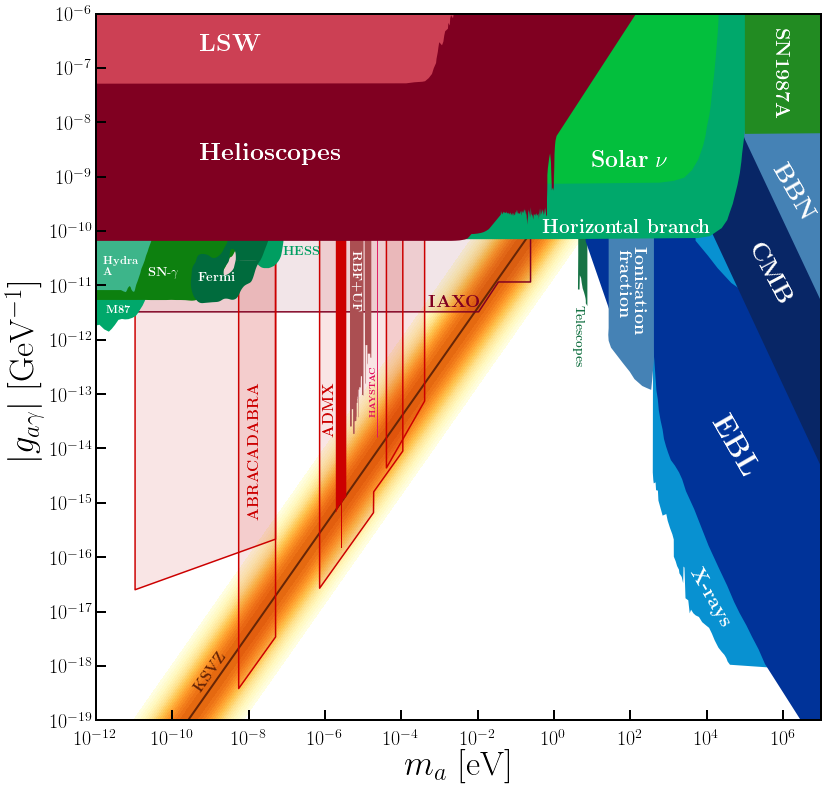

In [217]:
from numpy import *
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from scipy.stats import norm
plt.rcParams['axes.linewidth'] = 2
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
fig = plt.figure(figsize=(13,13))
ax = fig.add_subplot(111)

# Axes limits on coupling (g) and mass (m)
g_min = 1.0e-19
g_max = 1.0e-6
m_min = 1.0e-12
m_max = 1.0e7



#######################################################################################################################
## QCD Axion band:
# Mass-coupling relation
# g_agamma in GeV^-1 and m_a in eV
def g_ag(C_ag,m_a):
    return 2e-10*C_ag*m_a

# Shaded QCD axion band
n = 200
g = logspace(log10(g_min),log10(g_max),n)
m = logspace(log10(m_min),log10(m_max),n)
QCD = zeros(shape=(n,n))
for i in range(0,n):
    QCD[:,i] = norm.pdf(log10(g)-log10(g_ag(1.92,m[i])),0.0,0.8)                 
cols = cm.get_cmap('YlOrBr') 
cols.set_under('w') # Set lowest color to white
plt.contourf(m, g, QCD, 30,cmap=cols,edgecolor=None,vmin=0.1,vmax=0.7,zorder=0)
#plt.pcolor(m,g,QCD,cmap=cols,vmin=1e-2,vmax=0.7,zorder=0)
#plt.pcolor(m,g,QCD,cmap=cols,vmin=1e-2,vmax=0.7,zorder=0)

# QCD Axion model lines
KSVZ = g_ag(1.92,m) # KSVZ Axion |C_agamma| = 1.92
DFSZ = g_ag(0.75,m) # DSFZ Axion |C_agamma| = 0.75
plt.plot(m,KSVZ,'-',linewidth=2,color=cols(1.0),zorder=0)
#plt.plot(m,DFSZ,'-',linewidth=2,color=cols(1.0),zorder=0)
plt.text(3.3466e-10,   1.2261e-18 ,r'{\bf KSVZ}',fontsize=15,rotation=55,color=cols(1.0))
#plt.text( 5.2628e-07,   2.3013e-16,r'{\bf DFSZ}',fontsize=20,rotation=50,color=cols(1.0))


######################################################################################################################
## Haloscopes
RBF_col = [0.67, 0.31, 0.32]
RBF = loadtxt("limit_data/RBF_UF_Haloscopes.txt") 
plt.fill_between(RBF[:,0],RBF[:,1],y2=g[-1],edgecolor=None,facecolor=RBF_col,zorder=0.1)
plt.text(0.45e-5,3e-11,r'{\bf RBF+UF}',fontsize=13,color='w',rotation=-90)

ADMX_col = [0.8, 0.0, 0.0]
ADMX = loadtxt("limit_data/ADMX.txt") 
plt.fill_between(ADMX[:,0],ADMX[:,1],y2=g[-1],edgecolor=None,facecolor=ADMX_col,zorder=0.1)
ADMX = loadtxt("limit_data/ADMX2017.txt") 
plt.fill_between(ADMX[:,0],ADMX[:,1],y2=g[-1],edgecolor=None,facecolor=ADMX_col,zorder=0.1)
plt.text(0.9e-6,1e-13,r'{\bf ADMX}',fontsize=15,color=ADMX_col,rotation=90)

HAYSTAC_col= [0.88, 0.07, 0.37]
HAYSTAC = loadtxt("limit_data/HAYSTAC.txt") 
plt.fill_between(HAYSTAC[:,0],HAYSTAC[:,1],y2=g[-1],edgecolor=None,facecolor=HAYSTAC_col,zorder=0.1)
plt.text(1.5e-5,2.5e-13,r'{\bf HAYSTAC}',fontsize=9,color=HAYSTAC_col,rotation=90)


######################################################################################################################
# Projected Limits:
# IAXO arXiv[]
IAXO = loadtxt("limit_data/IAXO.txt")
plt.plot(IAXO[:,0],IAXO[:,1],'-',linewidth=1.5,color=CAST_col,zorder=0)
plt.text(0.5e-3,4e-12,r'{\bf IAXO}',fontsize=18,color=CAST_col)
plt.fill_between(IAXO[:,0],IAXO[:,1],y2=g[-1],edgecolor=None,facecolor=CAST_col,zorder=0,alpha=0.1)

# ADMX arXiv[]
ADMX_Projected = loadtxt("limit_data/ADMX_Projected.txt")
plt.plot(ADMX_Projected[:,0],ADMX_Projected[:,1],'-',linewidth=1.5,color=ADMX_col,zorder=0)
plt.fill_between(ADMX_Projected[:,0],ADMX_Projected[:,1],y2=g[-1],edgecolor=None,facecolor=ADMX_col,zorder=0,alpha=0.1)

# MADMAX arXiv[]
MADMAX = loadtxt("limit_data/MADMAX.txt")
plt.plot(MADMAX[:,0],MADMAX[:,1],'-',linewidth=1.5,color=ADMX_col,zorder=0)
plt.fill_between(MADMAX[:,0],MADMAX[:,1],y2=g[-1],edgecolor=None,facecolor=ADMX_col,zorder=0,alpha=0.1)

# ABRACADABRA arXiv[]
ABRA1 = loadtxt("limit_data/ABRACADABRA_Broadband.txt")
ABRA2 = loadtxt("limit_data/ABRACADABRA_Resonant.txt")
plt.plot(ABRA1[:,0],ABRA1[:,1],'-',linewidth=1.5,color=ADMX_col,zorder=0)
plt.plot(ABRA2[:,0],ABRA2[:,1],'-',linewidth=1.5,color=ADMX_col,zorder=0)
plt.fill_between(ABRA2[:,0],ABRA2[:,1],y2=g[-1],edgecolor=None,facecolor=ADMX_col,zorder=0,alpha=0.1)
plt.fill_between(ABRA1[:,0],ABRA1[:,1],y2=g[-1],edgecolor=None,facecolor=ADMX_col,zorder=0,alpha=0.1)
plt.text(1e-8,1e-13,r'{\bf ABRACADABRA}',rotation=90,fontsize=15,color=ADMX_col)



#######################################################################################################################
### Astrophysical constraints
# M87 Limits from arXiv:[]
M87_col = [0.0, 0.66, 0.42]
M87 = loadtxt("limit_data/M87.txt")
plt.fill_between(M87[:,0],M87[:,1],y2=g[-1],edgecolor=None,facecolor=M87_col,zorder=0.2)
plt.text(1.8e-12,   3e-12,r'\quad {\bf M87}',fontsize=11,color='w')

# SN-gamma rays arXiv:[]
SNgamma_col = [0.05, 0.5, 0.06]
SNgamma = loadtxt("limit_data/SN-gamma.txt")
plt.fill_between(SNgamma[:,0],SNgamma[:,1],y2=g[-1],edgecolor=None,facecolor=SNgamma_col,zorder=0.2)
plt.text(2.3e-11,1.5e-11,r'{\bf SN}-$\gamma$',fontsize=13,color='w')

# HYDRA-A arXiv:[]
HYDRA_col = [0.24, 0.71, 0.54]
HYDRA = loadtxt("limit_data/HYDRA_A.txt")
plt.fill_between(HYDRA[:,0],HYDRA[:,1],y2=g[-1],edgecolor=None,facecolor=HYDRA_col,zorder=0.2)
plt.text(1.5e-12,2.5e-11,r'{\bf Hydra}',fontsize=11,color='w')
plt.text(1.5e-12,1.5e-11,r'\quad {\bf A}',fontsize=11,color='w')

# HESS arXiv:[]
HESS_col = [0.0, 0.62, 0.38]
HESS = loadtxt("limit_data/HESS.txt")
plt.fill_between(HESS[:,0],HESS[:,1],y2=g[-1],edgecolor=None,facecolor=HESS_col,zorder=0.2)
plt.text(8e-8,3.55e-11,r'{\bf HESS}',fontsize=13,color=HESS_col)

# Fermi NGC1275 arXiv:[]
Fermi_col = [0.0, 0.42, 0.24]
Fermi1 = loadtxt("limit_data/Fermi1.txt")
Fermi2 = loadtxt("limit_data/Fermi2.txt")
plt.fill_between(Fermi1[:,0],Fermi1[:,1],y2=g[-1],edgecolor=None,facecolor=Fermi_col,zorder=0.2)
plt.fill(Fermi2[:,0],1.01*Fermi2[:,1],edgecolor=None,facecolor=Fermi_col)
plt.text(4.8e-10,1.2e-11,r'{\bf Fermi}',fontsize=13,color='w')

# Optical telescope arXiv:[]
Telescopes_col = [0.09, 0.45, 0.27]
Telescopes = loadtxt("limit_data/Telescopes.txt")
plt.fill_between(Telescopes[:,0],Telescopes[:,1],y2=g[-1],edgecolor=None,facecolor=Telescopes_col,zorder=0.2)
plt.text(3,3e-12,r'{\bf Telescopes}',fontsize=12,color=Telescopes_col,rotation=-90)




######################################################################################################################
## Cosmology constraints:
# Xray Background arXiv:
XRAY_col = [0.03, 0.57, 0.82]
XRAY = loadtxt("limit_data/XRAY.txt")
plt.fill_between(XRAY[:,0],XRAY[:,1],y2=g[-1],edgecolor=None,facecolor=XRAY_col,zorder=0.5)
plt.text(3e3,0.4e-16,r'{\bf X-rays}',fontsize=20,color='w',rotation=-60)

# CMB 
CMB_col = [0.03, 0.15, 0.4]
CMB = loadtxt("limit_data/CMB.txt")
plt.fill(CMB[:,0],CMB[:,1],edgecolor=None,facecolor=CMB_col,zorder=0.5)
plt.text(1e5,3.3306e-11,r'{\bf CMB}',fontsize=25,rotation=-62,color='w')

# Extragalactic background light
EBL_col =  [0.0, 0.2, 0.6]
EBL = loadtxt("limit_data/EBL.txt")
EBL2 = loadtxt("limit_data/EBL2.txt")
plt.fill_between(EBL[:,0],EBL[:,1],y2=g[-1],edgecolor=None,facecolor=EBL_col,zorder=0.5)
plt.fill_between(EBL2[:,0],EBL2[:,1],y2=g[-1],edgecolor=None,facecolor=EBL_col,zorder=0.5)
plt.text(1e4,2e-14,r'{\bf EBL}',fontsize=30,color='w',rotation=-60)

# Ionisation fraction
x_ion_col = [0.27, 0.51, 0.71]
x_ion = loadtxt("limit_data/x_ion.txt")
plt.fill_between(x_ion[:,0],x_ion[:,1],y2=g[-1],edgecolor=None,facecolor=x_ion_col,zorder=0.5)
plt.text(100.5744,3.0720e-11,r'{\bf Ionisation}',fontsize=18,color='w',rotation=-90)
plt.text(40,2.6720e-11,r'{\bf fraction}',fontsize=18,color='w',rotation=-90)

# BBN
BBN_col = [0.27, 0.51, 0.71]
BBN = loadtxt("limit_data/BBN.txt")
plt.fill_between(BBN[:,0],BBN[:,1],y2=g[-1],edgecolor=None,facecolor=BBN_col,zorder=0.5)
plt.text(0.4e6,1e-9,r'{\bf BBN}',fontsize=25,color='w',rotation=-60)


######################################################################################################################
# Stellar physics constraints
HB_col = [0.0, 0.66, 0.42]
HB = loadtxt("limit_data/HorizontalBranch.txt")
plt.fill_between(HB[:,0],HB[:,1],y2=g[-1],edgecolor=None,facecolor=HB_col,zorder=1)
plt.text(0.5e0,0.9e-10,r'{\bf Horizontal branch}',fontsize=19,color='w')

SolarNu_col = [0.01, 0.75, 0.24]
SolarNu = loadtxt("limit_data/SolarNu.txt")
plt.fill_between(SolarNu[:,0],SolarNu[:,1],y2=g[-1],edgecolor=None,facecolor=SolarNu_col,zorder=1)
plt.text(1e1,1.5e-9,r'{\bf Solar} $\nu$',fontsize=23,color='w')

SN = loadtxt("limit_data/SN1987A.txt")
plt.fill_between(SN[:,0],SN[:,1],y2=g[-1],edgecolor=None,facecolor='ForestGreen',zorder=1)
plt.text(0.5e6,3e-7,r'{\bf SN1987A}',fontsize=20,color='w',rotation=-90)


######################################################################################################################
# LABORATORY
# CAST arXiv:
CAST_col = [0.5, 0.0, 0.13]
CAST = loadtxt("limit_data/CAST.txt") 
CAST17 = loadtxt("limit_data/CAST_2017.txt") 
plt.fill_between(CAST[:,0],CAST[:,1],y2=g[-1],edgecolor=None,facecolor=CAST_col,zorder=1.5)
plt.fill_between(CAST17[:,0],CAST17[:,1],y2=g[-1],edgecolor=None,facecolor=CAST_col,zorder=1.5)
plt.text(5e-10,2e-9,r'{\bf Helioscopes}',fontsize=25,color='w')

# ALPS-I arXiv:
ALPS_col = [0.8, 0.25, 0.33]
ALPS = loadtxt("limit_data/ALPS.txt") 
plt.fill_between(ALPS[:,0],ALPS[:,1],y2=g[-1],edgecolor=None,facecolor=ALPS_col,zorder=1.5)
plt.text(5e-10,2e-7,r'{\bf LSW}',fontsize=25,color='w')

# Beam dump LEP and LHC arxiv:[1509.00476]
#BEAM_col = [0.8, 0.25, 0.33]
#BEAM = loadtxt("limit_data/Beam_dump.txt") 
#plt.fill_between(BEAM[:,0],BEAM[:,1],y2=g[-1],edgecolor=None,facecolor=ALPS_col,zorder=1)
#plt.text(5e6,1e-6,r'{\bf Beam dump}',fontsize=10,color='w',rotation=-30)






######################################################################################################################
### ALP & Axions as dark matter
#DM_col = [0.25, 0.4, 0.96]
#Axion_CDM = loadtxt("limit_data/Axion_CDM.txt")
#ALP_CDM = loadtxt("limit_data/ALP_CDM.txt")
#plt.plot(Axion_CDM[:,0],Axion_CDM[:,1],'-',linewidth=3,color=DM_col,zorder=3)
#plt.plot(ALP_CDM[0:2,0],ALP_CDM[0:2,1],'-',linewidth=3,color=DM_col,zorder=3)
#plt.plot(ALP_CDM[1:3,0],ALP_CDM[1:3,1],'--',linewidth=3,color=DM_col,zorder=3)
#plt.text(1e-11,1.3e-13,r'{\bf ALP CDM}',fontsize=16,color=DM_col,rotation=32)
#plt.text(5e-3,2e-13,r'{\bf Axion}',fontsize=15,color=DM_col,rotation=-90)
#plt.text(1.8e-3,2.5e-13,r'\quad {\bf CDM}',fontsize=15,color=DM_col,rotation=-90)







######################################################################################################################
# Labels
plt.xlabel(r"$m_a$ [eV]",fontsize=35)
plt.ylabel(r"$|g_{a\gamma}|$ [GeV$^{-1}$]",fontsize=35)

# Limits
ax.set_xlim(left=m[0], right=m[-1])
ax.set_ylim(bottom=g[0], top=g[-1])

# Style
plt.xscale('log')
plt.yscale('log')
plt.minorticks_on()
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
xtx = power(10.0,arange(log10(m_min),log10(m_max)+1,2.0))
ytx = power(10.0,arange(log10(g_min),log10(g_max)+1,1.0))
ax.set_xticks(xtx)
ax.set_yticks(ytx)
ax.tick_params(which='major',direction='in',width=2,length=10)
ax.tick_params(which='minor',direction='in',width=1,length=7)
ax.tick_params(axis='x', which='major', pad=10)
ax.zorder = 5
# Show and save
plt.show()
fig.savefig('AxionLimits.pdf')